<a href="https://colab.research.google.com/github/msrcoarreola/MachineLearning2/blob/main/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

## Fundamentos

La Regresión Logística es un método supervisado de clasificación que modela la probabilidad de pertenecer a una clase (típicamente binaria) mediante una transformación del producto escalar lineal entre los pesos y las características a través de la función sigmoide. Convierte un modelo lineal en una probabilidad en el rango [0,1].

Principales propiedades:

Basa su predicción en la probabilidad condicional
P(y=1∣X)

Usa la función sigmoide para mapear valores reales a probabilidades.

Se entrena maximizando la verosimilitud (equivalente a minimizar la pérdida logística o log-loss) mediante métodos como descenso de gradiente.

## Modelo matemático

### Modelo lineal (log-odds)
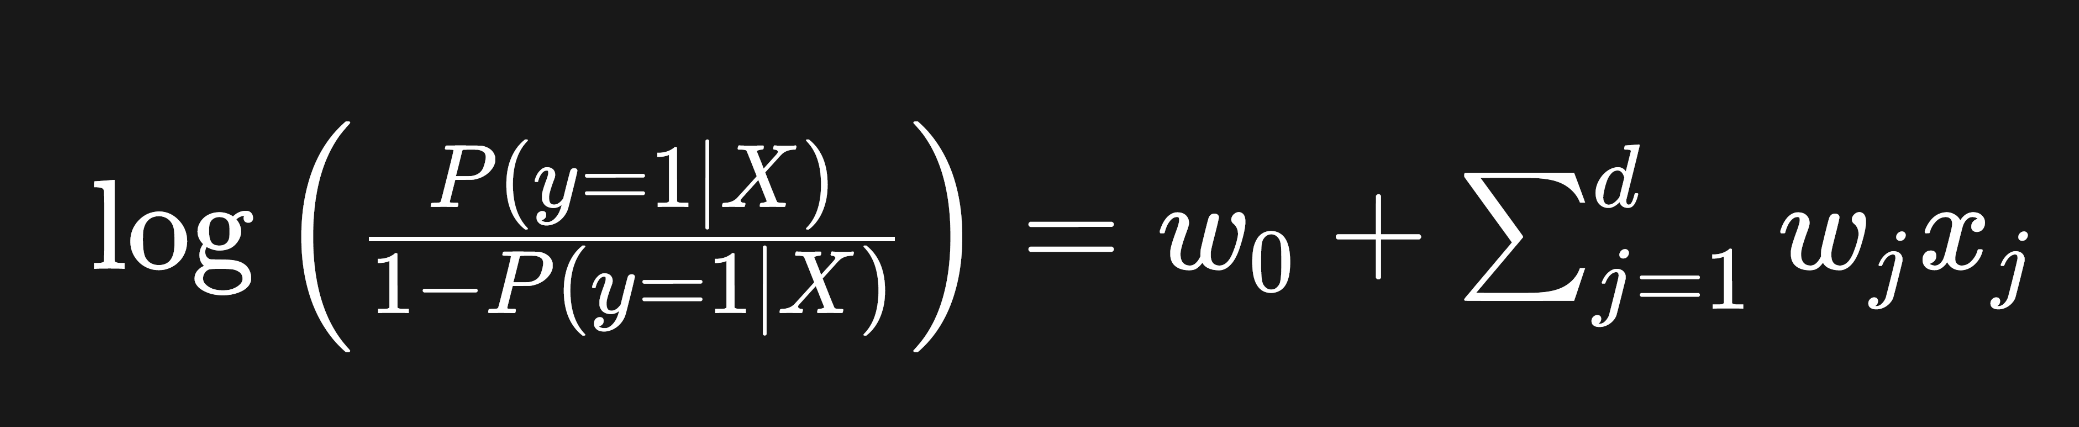

### Función sigmoide (para obtener la probabilidad)
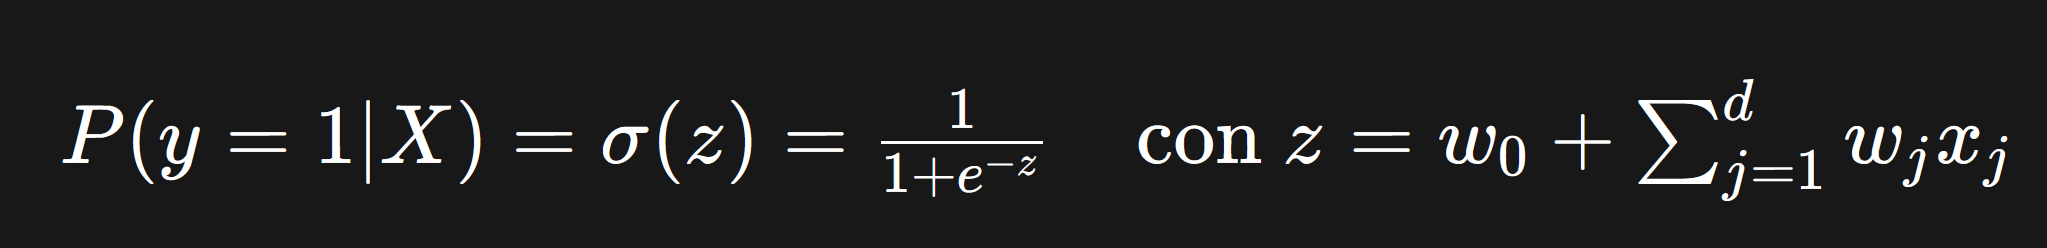

### Función de verosimilitud y log-verosimilitud (para N observaciones)
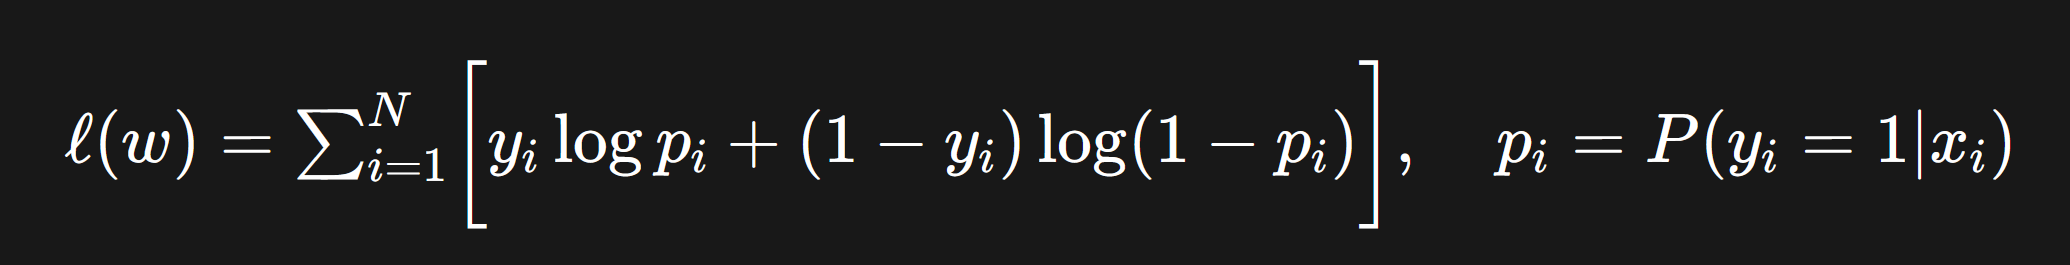

### Gradiente de la log-verosimilitud (usado en descenso de gradiente)
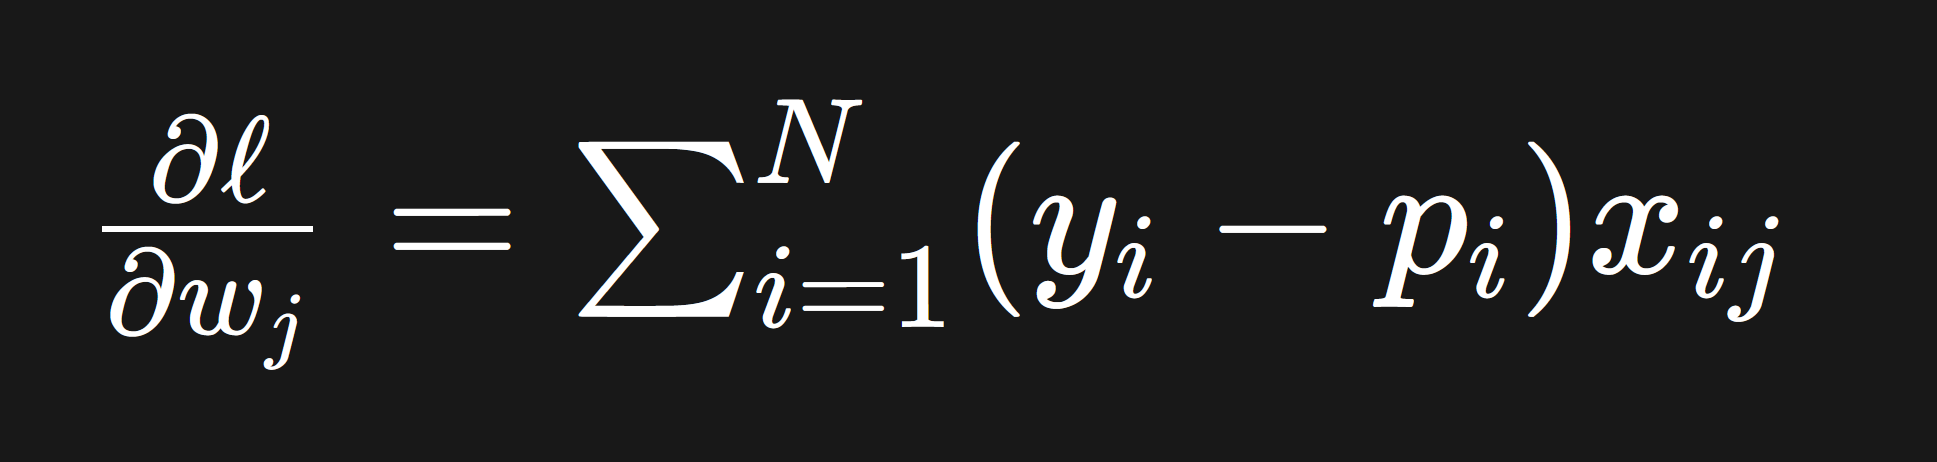

## ibrerías, clases, funciones y parámetros

pandas — pd.read_csv, DataFrame: manipulación de datos.

numpy — arreglos numéricos y transformaciones.

matplotlib.pyplot y seaborn — visualizaciones (scatter, pairplot, heatmap).

sklearn.model_selection — train_test_split, GridSearchCV.

sklearn.preprocessing — StandardScaler, MinMaxScaler.

sklearn.feature_selection — SelectKBest, f_classif.

sklearn.linear_model — LogisticRegression:

penalty: regularización ('l2', 'l1', none).

C: inverso de la fuerza de regularización (mayor C => menos regularización).

solver: optimizador ('lbfgs', 'saga', etc.).

max_iter: iteraciones máximas.

sklearn.metrics — confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve.

## Importar librerías

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Dataset

In [9]:
# Cargar dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


print('Shape X:', X.shape)
X.head()

Shape X: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Análisis estadístico

In [10]:
# Estadísticas descriptivas
display(X.describe().T)


# Balance de clases
display(y.value_counts(normalize=True))


# Valores nulos
print('Nulls per column:\n', X.isnull().sum())

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


,proportion
target,
1,0.627417
0,0.372583


Nulls per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


## Scatter plots y visualizaciones

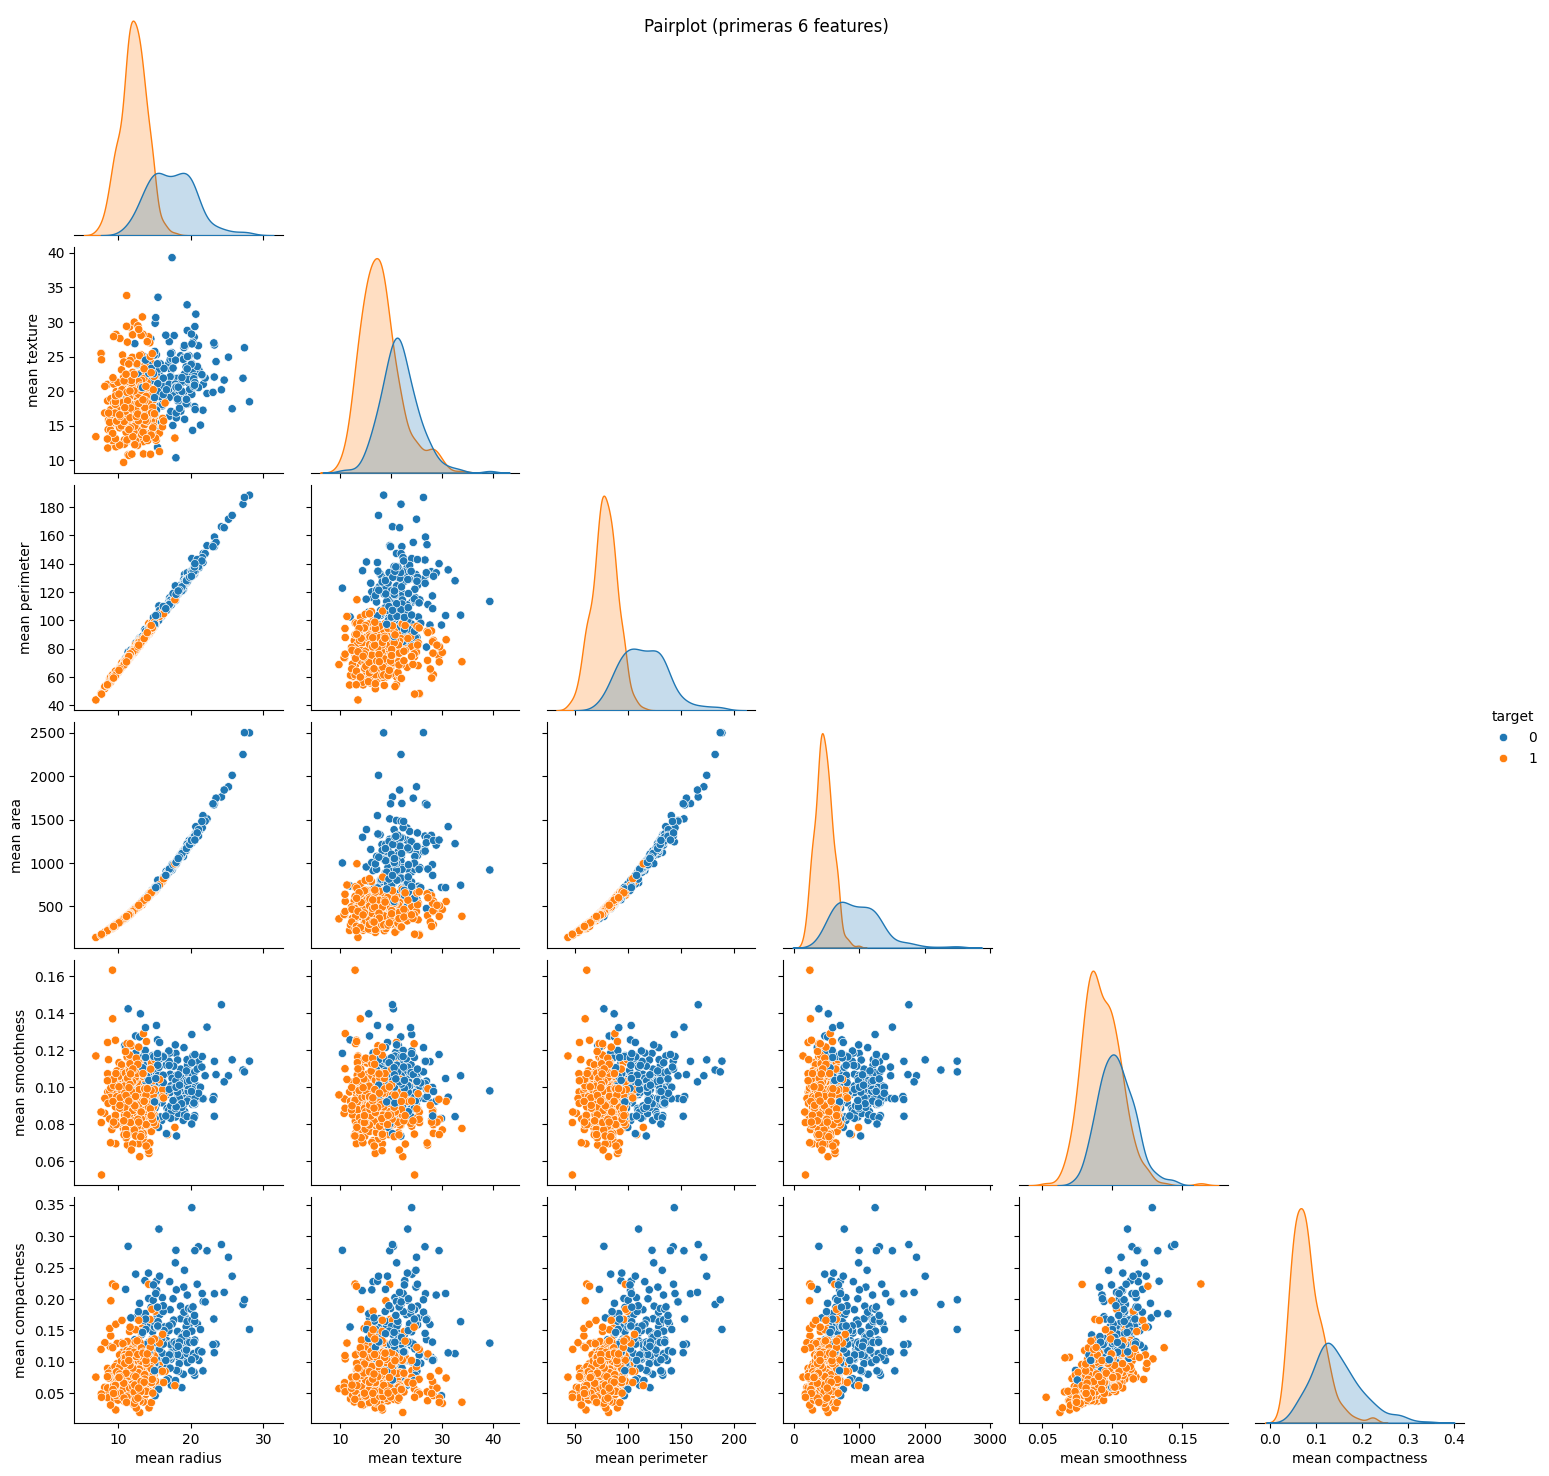

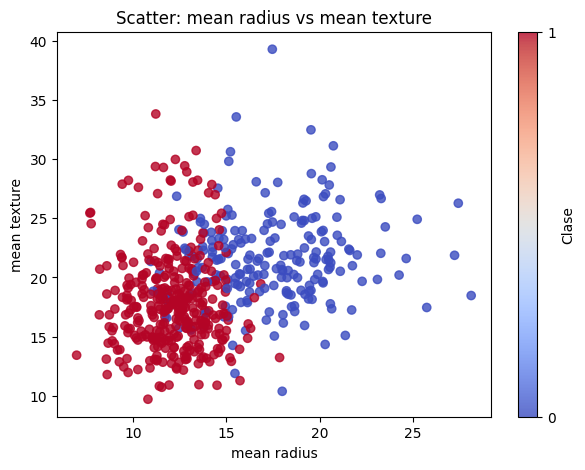

In [11]:
# Pairplot de las primeras 6 features para visualizar separación
sns.pairplot(pd.concat([X.iloc[:, :6], y], axis=1), hue='target', corner=True)
plt.suptitle('Pairplot (primeras 6 features)')
plt.show()


# Scatter simple entre dos features seleccionadas
plt.figure(figsize=(7,5))
plt.scatter(X['mean radius'], X['mean texture'], c=y, cmap='coolwarm', alpha=0.8)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('Scatter: mean radius vs mean texture')
plt.colorbar(ticks=[0,1], label='Clase')
plt.show()

## Feature Engineering

In [12]:
# Dividir antes de cualquier selección para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# Escalado (recomendado para regresión logística cuando features tienen distintas escalas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Selección de features: SelectKBest con ANOVA F
selector = SelectKBest(score_func=f_classif, k=8) # escoger 8 mejores
selector.fit(X_train_scaled, y_train)
mask = selector.get_support()
selected_cols = X.columns[mask]
print('Selected features:', list(selected_cols))


# Transformar conjuntos
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


## Prediction — entrenar modelo y función de predicción

In [13]:
# Entrenar regresión logística
clf = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
clf.fit(X_train_sel, y_train)


# Función que recibe un patrón (sin escalar) y devuelve la clase y la probabilidad
# Función que recibe un patrón (sin escalar) y devuelve la clase y la probabilidad
def predict_instance_lr(model, scaler, selector, feature_names, raw_instance):
    """
    Devuelve (pred_class, pred_prob)
    raw_instance: lista/array con las mismas columnas que X (sin escalar)
    feature_names: lista de nombres de las columnas (orden correcto)
    """
    # Convertir a DataFrame con nombres
    df = pd.DataFrame([raw_instance], columns=feature_names)

    # Escalar y seleccionar
    arr_scaled = scaler.transform(df)
    arr_sel = selector.transform(arr_scaled)

    # Predicciones
    pred_class = model.predict(arr_sel)[0]
    pred_prob = model.predict_proba(arr_sel)[0, 1]

    return pred_class, pred_prob



# Ejemplo de uso:
sample_raw = X_test.iloc[0].values
pred_class, pred_prob = predict_instance_lr(clf, scaler, selector, X.columns, sample_raw)
print('Predicted class:', pred_class, 'Prob(class=1):', pred_prob, 'Actual:', int(y_test.iloc[0]))

Predicted class: 1 Prob(class=1): 0.9693476320536006 Actual: 1


## Model evaluation

### Predicciones y matriz de confusión

Confusion matrix:
 [[49  4]
 [ 4 86]]


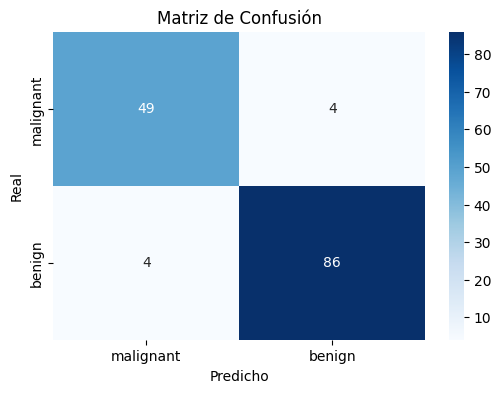

In [14]:
y_pred = clf.predict(X_test_sel)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)


# Visualizar con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### Accuary

In [15]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.9441
